<a href="https://colab.research.google.com/github/Niushamesgari/Bees_Detection/blob/main/object_detection_bees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0TmfXz3UZSSiUMPMstoB")
project = rf.workspace("roboflow-100").project("bees-jt5in")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to bees-2 in yolov8:: 100%|██████████| 16172/16172 [00:10<00:00, 1476.74it/s]


In [2]:
config_file_template = '''
names:
- bees
nc: 1
roboflow:
  license: CC BY 4.0
  project: bees-jt5in
  url: https://universe.roboflow.com/roboflow-100/bees-jt5in/dataset/2
  version: 2
  workspace: roboflow-100
test: /content/bees-2/test/images
train: /content/bees-2/train/images
val: /content/bees-2/valid/images
'''

with open('/content/bees-2/data.yaml', 'w') as f:
    f.write(config_file_template)

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 751.2 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
from ultralytics import YOLO
#model = YOLO('yolov8n.yaml').load('yolov8n.pt')
# build from YAML and transfer weights

# Train the model
#results = model.train(data="/content/bees-2/data.yaml", epochs=2, imgsz=(508))

In [ ]:
#model.export()

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 512, 512) BCHW and output shape(s) (1, 5, 5376) (5.9 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 3.1s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (5.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=512  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=512 data=/content/bees-2/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

In [1]:
from ultralytics import YOLO
model = YOLO('best (after 20 epoch).pt')


0: 672x1152 1 bees, 628.0ms
1: 672x1152 1 bees, 628.0ms
2: 672x1152 (no detections), 628.0ms
3: 672x1152 1 bees, 628.0ms
Speed: 30.1ms preprocess, 628.0ms inference, 7.6ms postprocess per image at shape (1, 3, 672, 1152)


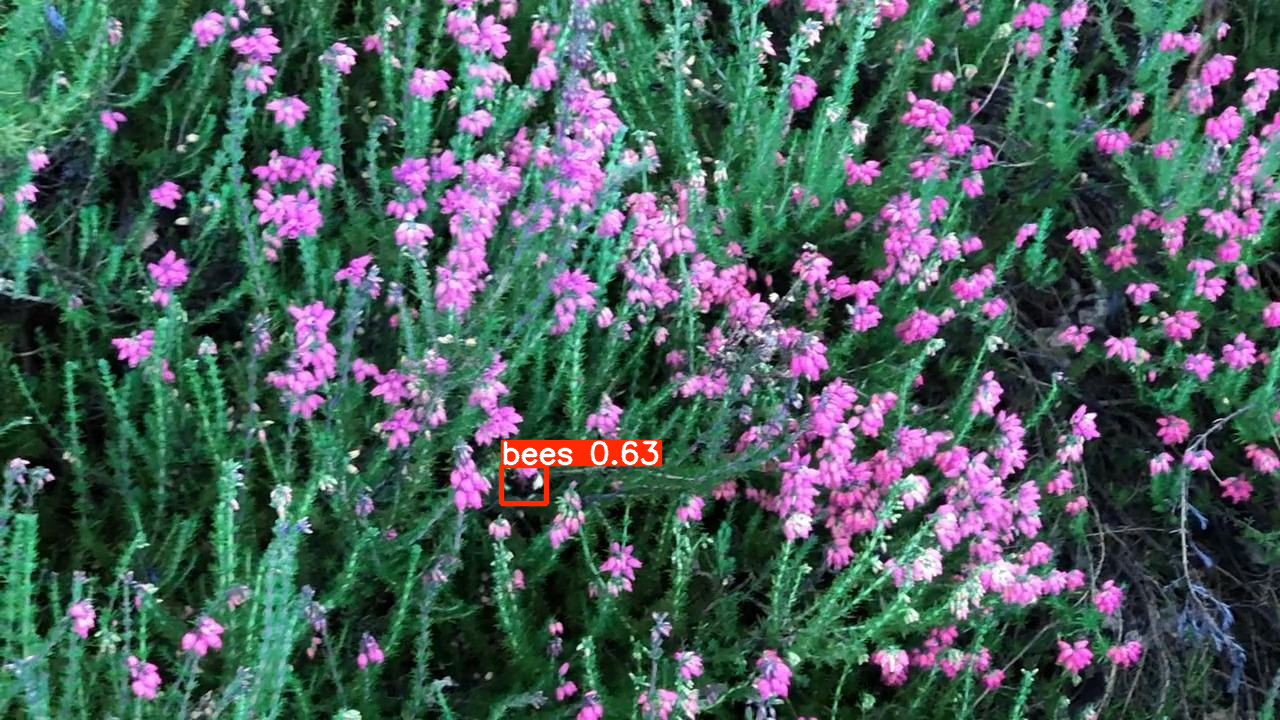

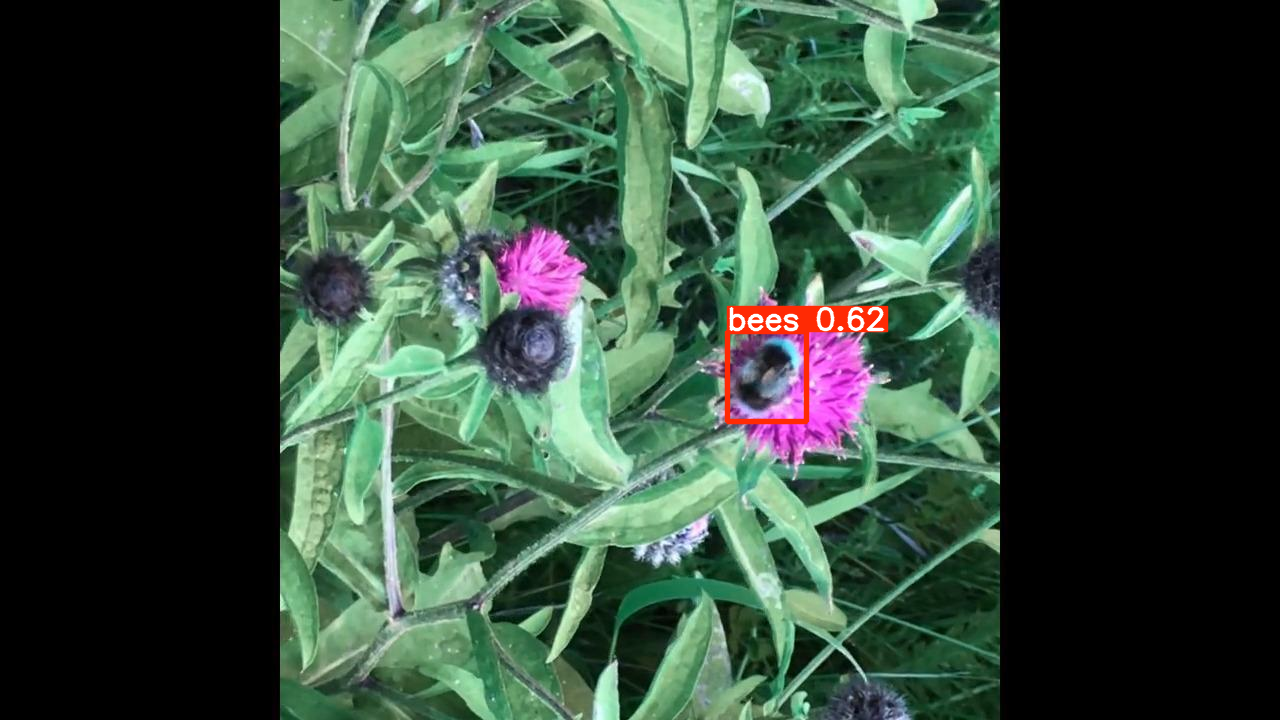

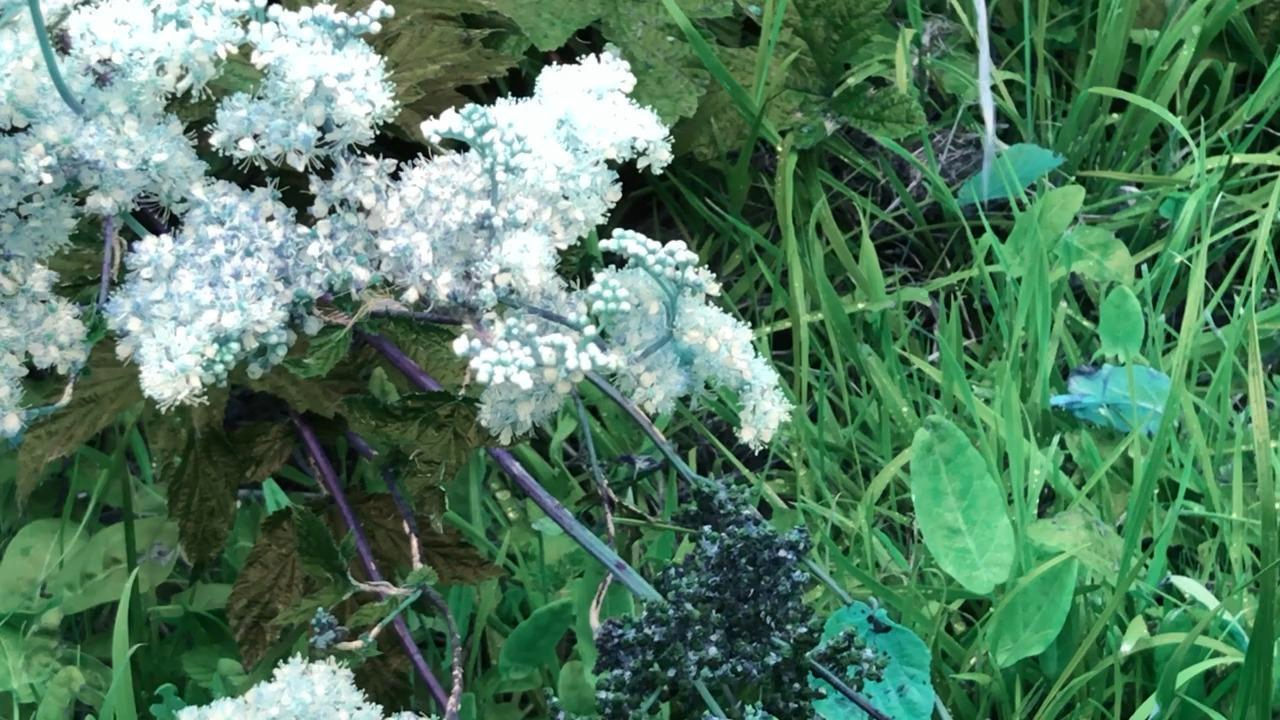

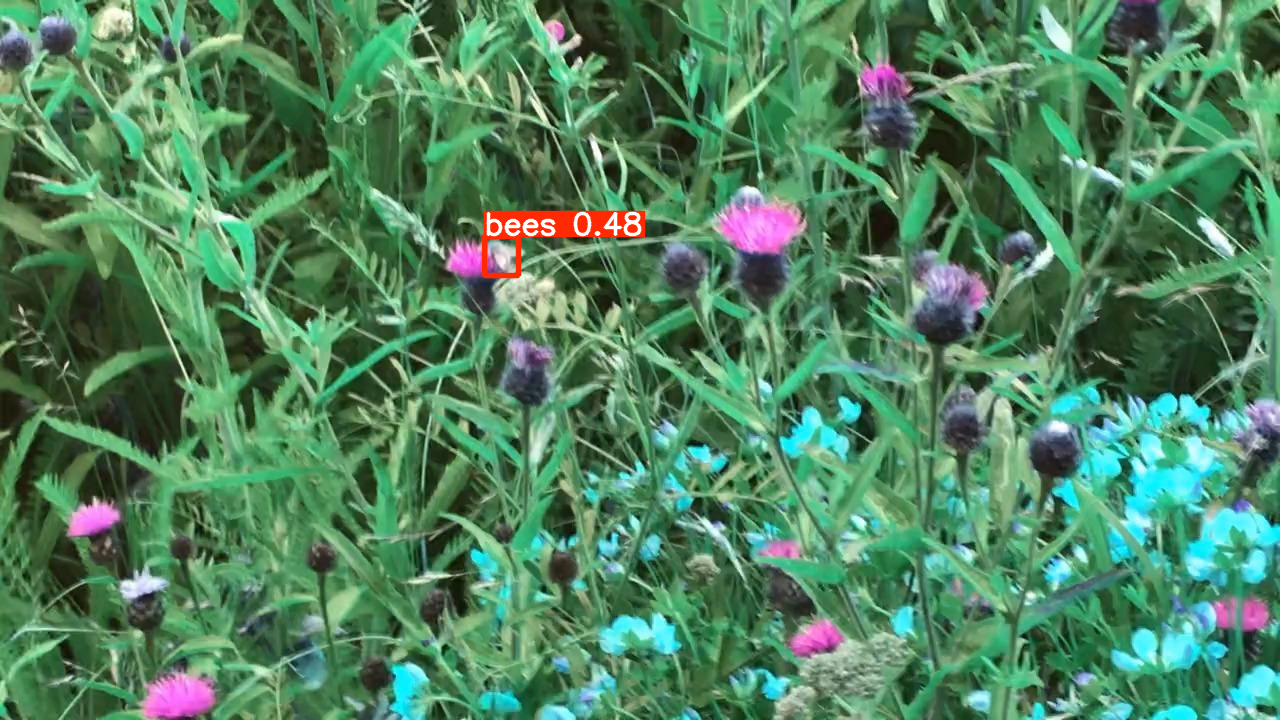

In [9]:
import glob
from PIL import Image
test_image=glob.glob('/content/bees-2/test/images/*.jpg')
results=model(test_image[4:8],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))


In [ ]:
#for solving the bug
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [11]:
!pip install --upgrade gradio==4.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [16]:
import gradio as gr
from PIL import Image
from ultralytics import YOLO

# Load the model
model = YOLO('best (after 20 epoch).pt')

# Define the image detection function
def detect_img(img):
    results = model([img], stream=False)
    res = results[0].plot()
    return Image.fromarray(res)

# Define the theme
theme = gr.themes.Soft(
    primary_hue="yellow",
    secondary_hue="stone",
    neutral_hue="gray"
)

# Create the Gradio interface
demo = gr.Interface(
    fn=detect_img,
    inputs=gr.Image(type='pil'),
    outputs=gr.Image(type='pil'),
    title="Bees Detection ML App",
    examples=[
        "bee(1).jpg",
        "bee(2).jpg",
        "bee(3).jpg",
        "bee(4).jpg",
        "bee(5).jpg"
    ],
    theme=theme
)




In [ ]:
demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bc8736970600588c00.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bc8736970600588c00.gradio.live
